In [2]:
# prompt: import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# install all thiese

!pip install numpy pandas matplotlib seaborn scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [4]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
y = true_salaries + noise  # Final dependent variable with noise

In [5]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [6]:
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise

In [7]:
# Step 3: Create a Linear Regression model
model = LinearRegression()  # Initialize the model

In [12]:

# Step 4: Train the model using the dataset
model.fit(x, Y)  # The model learns the best-fit line by minimizing the error # Changed X to x


LinearRegression()

In [13]:

# Step 5: Get the values of slope (m) and intercept (c) from the trained model
m = model.coef_[0]  # Coefficient (slope) of the regression line
c = model.intercept_  # Intercept (where the line crosses the Y-axis)

print(m)

4.965498141580592


In [14]:
print(c)

27.430065779800533


In [18]:
#step 6:Display the equation of the line
print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")

Equation of the line: Y = 4.97X + 27.43


In [17]:
#step 7:predict values using the model
Y_pred=model.predict(x) # predict salaries for the given experience values
print(Y_pred)

[32.39556392 37.36106206 42.3265602  47.29205835 52.25755649 57.22305463
 62.18855277 67.15405091 72.11954905 77.0850472 ]


In [22]:
#mean square error mean absoulte error
#-> MEasures avg squared difference between actual and predicted values
mse=mean_squared_error(Y,Y_pred)
print(f"mean squared error:{mse:.2f}")

mean squared error:11.75


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import both functions
#Measures avg absolute difference between actual and predicted values
mae = mean_absolute_error(Y, Y_pred)
print(f"mean absolute error: {mae:.2f}")

mean absolute error: 2.87


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Re-train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Now you can calculate RMSE using y_test and the predictions on the test data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

4.806038733797931


In [28]:
#Root Mean Squared Error ->MEasures standard deviation of residuals
rsme = np.sqrt(mse)
print(f"Root Mean Squared Error : {rsme:.2f}")

Root Mean Squared Error : 3.43


In [30]:
#R-Sqaured(R^2) -> Represents how well the model fits the data (0 to 1 , where 1 is best )
from sklearn.metrics import r2_score # Import the r2_score function
r2=r2_score(Y,Y_pred)
print(f"R-Squared(R^2):{r2:.2f}")

R-Squared(R^2):0.95


In [31]:
#5.Adjsuted R-squared(R^2_adj) -> Adjusted for the number of predictors,better for multiplie regressions
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-square:{adj_r2:.2f}")

Adjusted R-square:0.94


In [42]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        06:41:26   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


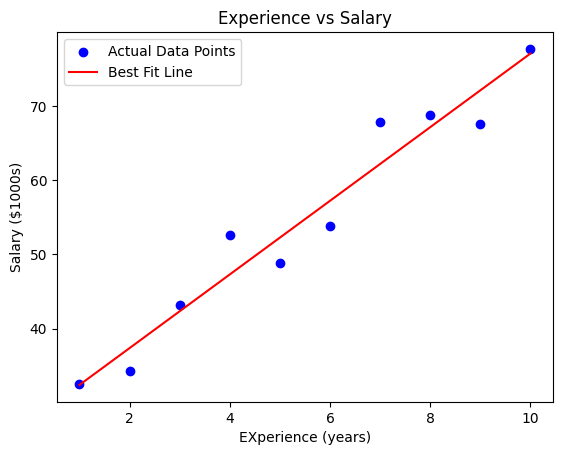

In [35]:
#step:8#plot actual data points
plt.scatter(x,Y ,color='blue',label='Actual Data Points')

#step 9:Plot the Regression line (Best fit Line)
plt.plot(x,Y_pred,color='red',label='Best Fit Line')

plt.xlabel("EXperience (years)")
plt.ylabel("Salary ($1000s)")
plt.title("Experience vs Salary")
plt.legend()
plt.show()

In [37]:
while True:
  try:
    exp=float(input("\n Enter years of the experience to predict salary (or -1 to exit):"))
    if exp == -1:
      break
    #Corrected method name from 'predicat' to 'predict' and variable name to 'Predicted_salary'
    Predicted_salary=model.predict(np.array([[exp]]))[0]
    print(f"Prediated Salary for {exp} years of experience: ${Predicted_salary:.2f}")
  except ValueError:
    print("Invalid input. Please enter a valid number of years.")


 Enter years of the experience to predict salary (or -1 to exit):4
Prediated Salary for 4.0 years of experience: $48.10

 Enter years of the experience to predict salary (or -1 to exit):4
Prediated Salary for 4.0 years of experience: $48.10

 Enter years of the experience to predict salary (or -1 to exit):0
Prediated Salary for 0.0 years of experience: $27.90

 Enter years of the experience to predict salary (or -1 to exit):-1


In [ ]:
# Step 1: Import necessary libraries
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
# Step 3: Creating a Linear Regression Model
# Step 4: Training the model using data set
# Step 5: Get the values of slope and intercept from the trained model
# Step 6: Display the equation of the line
# Step 7: Predit values using the model
# Step 8: Plot the regression line
#step 9: Prediction Features


In [38]:
import statsmodels.api as sm  # For OLS Regression


In [41]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures

# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(x)  # Transforming x to polynomial features, Changed X to x
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
